In [830]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt

In [831]:
pd.options.display.max_colwidth = 50 #default 50

In [832]:
plt.rcParams["figure.dpi"] = 120
plot_size = 6

In [833]:
data_dir = "../data"

In [ ]:
# df = pd.read_pickle(f"{data_dir}/results_718028_gpt2_truthful.pkl")

# df = pd.read_pickle(f"{data_dir}/results_718535_llama-awq_truthful.pkl")
# df = pd.read_pickle(f"{data_dir}/results_718695_llama-awq_trivia.pkl")

# df = pd.read_pickle(f"{data_dir}/results_718860_llama-3.1-8b_4bit_truthful.pkl")
df = pd.read_pickle(f"{data_dir}/results_718862_llama-3.1-8b_4bit_trivia.pkl")

In [835]:
df

,question,completion,completion_length,correct_answers,evaluation,completion_gradient,rephrased_completions,rephrased_completion_lengths,rephrased_gradients,rephrased_gradient_std
0,Which Lloyd Webber musical premiered in the US...,– 12 December 2019\nWhich Lloyd Webber musical...,87,"[Sunset Blvd, West Sunset Boulevard, Sunset Bo...",False,8.761167,"[- December 12, 2019\nOn which date did a Lloy...","[99, 93, 95]","[12.787198066711426, 12.037333488464355, 11.32...",0.729183
1,Who was the next British Prime Minister after ...,A. Winston Churchill B. Herbert Asquith C. Dav...,59,"[Sir Henry Campbell-Bannerman, Campbell-Banner...",False,8.261396,[A. Winston Churchill B. Herbert Asquith C. Da...,"[57, 56, 57]","[12.292993545532227, 15.547170639038086, 12.07...",1.943781
2,Who had a 70s No 1 hit with Kiss You All Over?,Who had a 70s No 1 hit with Kiss You All Over?...,80,"[Internal exile, Exiles, Transported for life,...",False,7.501784,[Which artist scored a No. 1 hit in the 1970s ...,"[25, 19, 19]","[25.83541488647461, 29.83304786682129, 29.8782...",2.321181
3,What claimed the life of singer Kathleen Ferrier?,What was the cause of her death? The British s...,100,"[Cancer pathology, Deaths by cancer, Anti-canc...",False,18.546627,[What led to her passing? Born Kathleen Mary F...,"[88, 101, 105]","[19.913143157958984, 16.76297950744629, 16.816...",1.803433
4,Which actress was voted Miss Greenwich Village...,What was the name of the nightclub that the ac...,100,"[Bacall, Lauren Becal, Lauren Bacall, Lauren B...",False,9.029477,[What was the title of the nightclub the actre...,"[85, 77, 78]","[12.325281143188477, 12.452990531921387, 11.66...",0.421799
...,...,...,...,...,...,...,...,...,...,...
7972,Whose backing band is known as The Miami Sound...,Gloria Estefan\nWhat is the name of the 1977 h...,102,"[Gloria Maria Estefan, Gloria Estefan, Estefan...",True,10.775933,[What is the title of the successful song rele...,"[98, 96, 94]","[11.488875389099121, 12.825969696044922, 11.74...",0.708729
7973,"With a motto of Always Ready, Always There, wh...",(Hint: It's not the US Army)\nWhat US military...,35,"[National Guard, National guard, Guardia Nacio...",True,16.101231,[Which branch of the US military was establish...,"[26, 32, 31]","[19.515714645385742, 21.816804885864258, 19.66...",1.286969
7974,Who tried to steal Christmas from the town of ...,"The Grinch, of course! This story is one of th...",100,"[Grinch, The grinch, The Grinch]",True,12.315153,"[Of course, it’s the Grinch! This tale is amon...","[99, 97, 86]","[11.573022842407227, 12.2424955368042, 13.7661...",1.123927
7975,What is the name of the parson mentioned in th...,What is the name of the parson mentioned in th...,100,"[Orangeish blacks, Light brown, Orangeish blac...",False,7.415476,[Who is the parson referred to in the lyrics o...,"[33, 31, 33]","[18.07328987121582, 17.516651153564453, 18.998...",0.748672


In [836]:
df[df["completion_length"] == 0]

,question,completion,completion_length,correct_answers,evaluation,completion_gradient,rephrased_completions,rephrased_completion_lengths,rephrased_gradients,rephrased_gradient_std
13,Dave Gilmore and Roger Waters were in which ro...,,0,"[Grey Floyd, Pink Floyd trivia, The Screaming ...",True,0.0,[Avoid straying from the intended meaning in a...,"[35, 34, 31]","[25.356586456298828, 35.38125991821289, 29.165...",5.060291
28,Kim Carnes' nine weeks at No 1 with Bette Davi...,,0,"[Stars on 45 (Single), Stars On 45 Medley, Sta...",True,0.0,[Ensure that you remain true to the original i...,"[36, 30, 35]","[29.120220184326172, 29.23097038269043, 25.741...",1.983333
39,Brandon Lee died during the making of which mo...,,0,"[The Crow: Dead Time, The Crow (2016 film), Th...",False,0.0,[Maintain the original intent without alterati...,"[20, 15, 16]","[35.29289245605469, 38.98963165283203, 48.0892...",6.585547
100,In the late 60s Owen Finlay MacLaren pioneered...,,0,"[Baby Buggy, Baby buggy]",True,0.0,[Avoid straying from the original intent in an...,"[23, 25, 26]","[55.13107681274414, 31.77813148498535, 44.2888...",11.686403
228,For what novel did J. K. Rowling win the 1999 ...,,0,"[HPPOA, Prisoner of Azkaban, Harry Potter and ...",True,0.0,[Remain true to the original intent without an...,"[32, 29, 31]","[30.4879150390625, 34.99391174316406, 27.57788...",3.736524
...,...,...,...,...,...,...,...,...,...,...
7898,Name the 1998 movie from the IMDB plot summary...,,0,"[Danny Vinyard, White man marches on, Daniel V...",True,0.0,[Stay true to the core message without alterin...,"[32, 32, 28]","[31.38104248046875, 28.8389892578125, 31.39712...",1.472319
7910,"Prior to carving Mount Rushmore, Gutzon Borglu...",,0,"[Stone Mountain Park, Stone Mountain Memorial,...",True,0.0,[Maintain the core meaning without any alterat...,"[21, 19, 20]","[39.04452133178711, 44.46343231201172, 43.0992...",2.818578
7912,"By congressional resolution, Sam Wilson, of Tr...",,0,"[I Want YOU for the U.S. Army, I Want YOU for ...",True,0.0,[Please ensure that the core meaning remains u...,"[21, 25, 21]","[36.600887298583984, 29.93959617614746, 40.448...",5.316847
7923,"Although actually located in Black Canyon, wha...",,0,"[Boulder Canyon Project, Hoover Damn, Hooverda...",True,0.0,[Ensure that the core meaning remains unchange...,"[30, 30, 32]","[28.827777862548828, 27.31191635131836, 26.941...",0.999347


In [837]:
df["completion_gradient_normalized"] = df.apply(lambda row: row["completion_gradient"] / row["completion_length"] if row["completion_length"] > 0 else 0, axis=1)

In [838]:
df["rephrased_gradient_mean"] = df["rephrased_gradients"].apply(lambda x: np.mean(x))

In [839]:
def normalized_rephrases_gradients(row):
    grads = row['rephrased_gradients']
    rephrase_lengths = row['rephrased_completion_lengths']
    return [g / l if l else 0 for g, l in zip(grads, rephrase_lengths)]


df["rephrased_gradient_normalized_mean"] = df.apply(lambda row: np.mean(normalized_rephrases_gradients(row)), axis=1)

In [840]:
sum(df["evaluation"]) / len(df)

0.5488278801554469

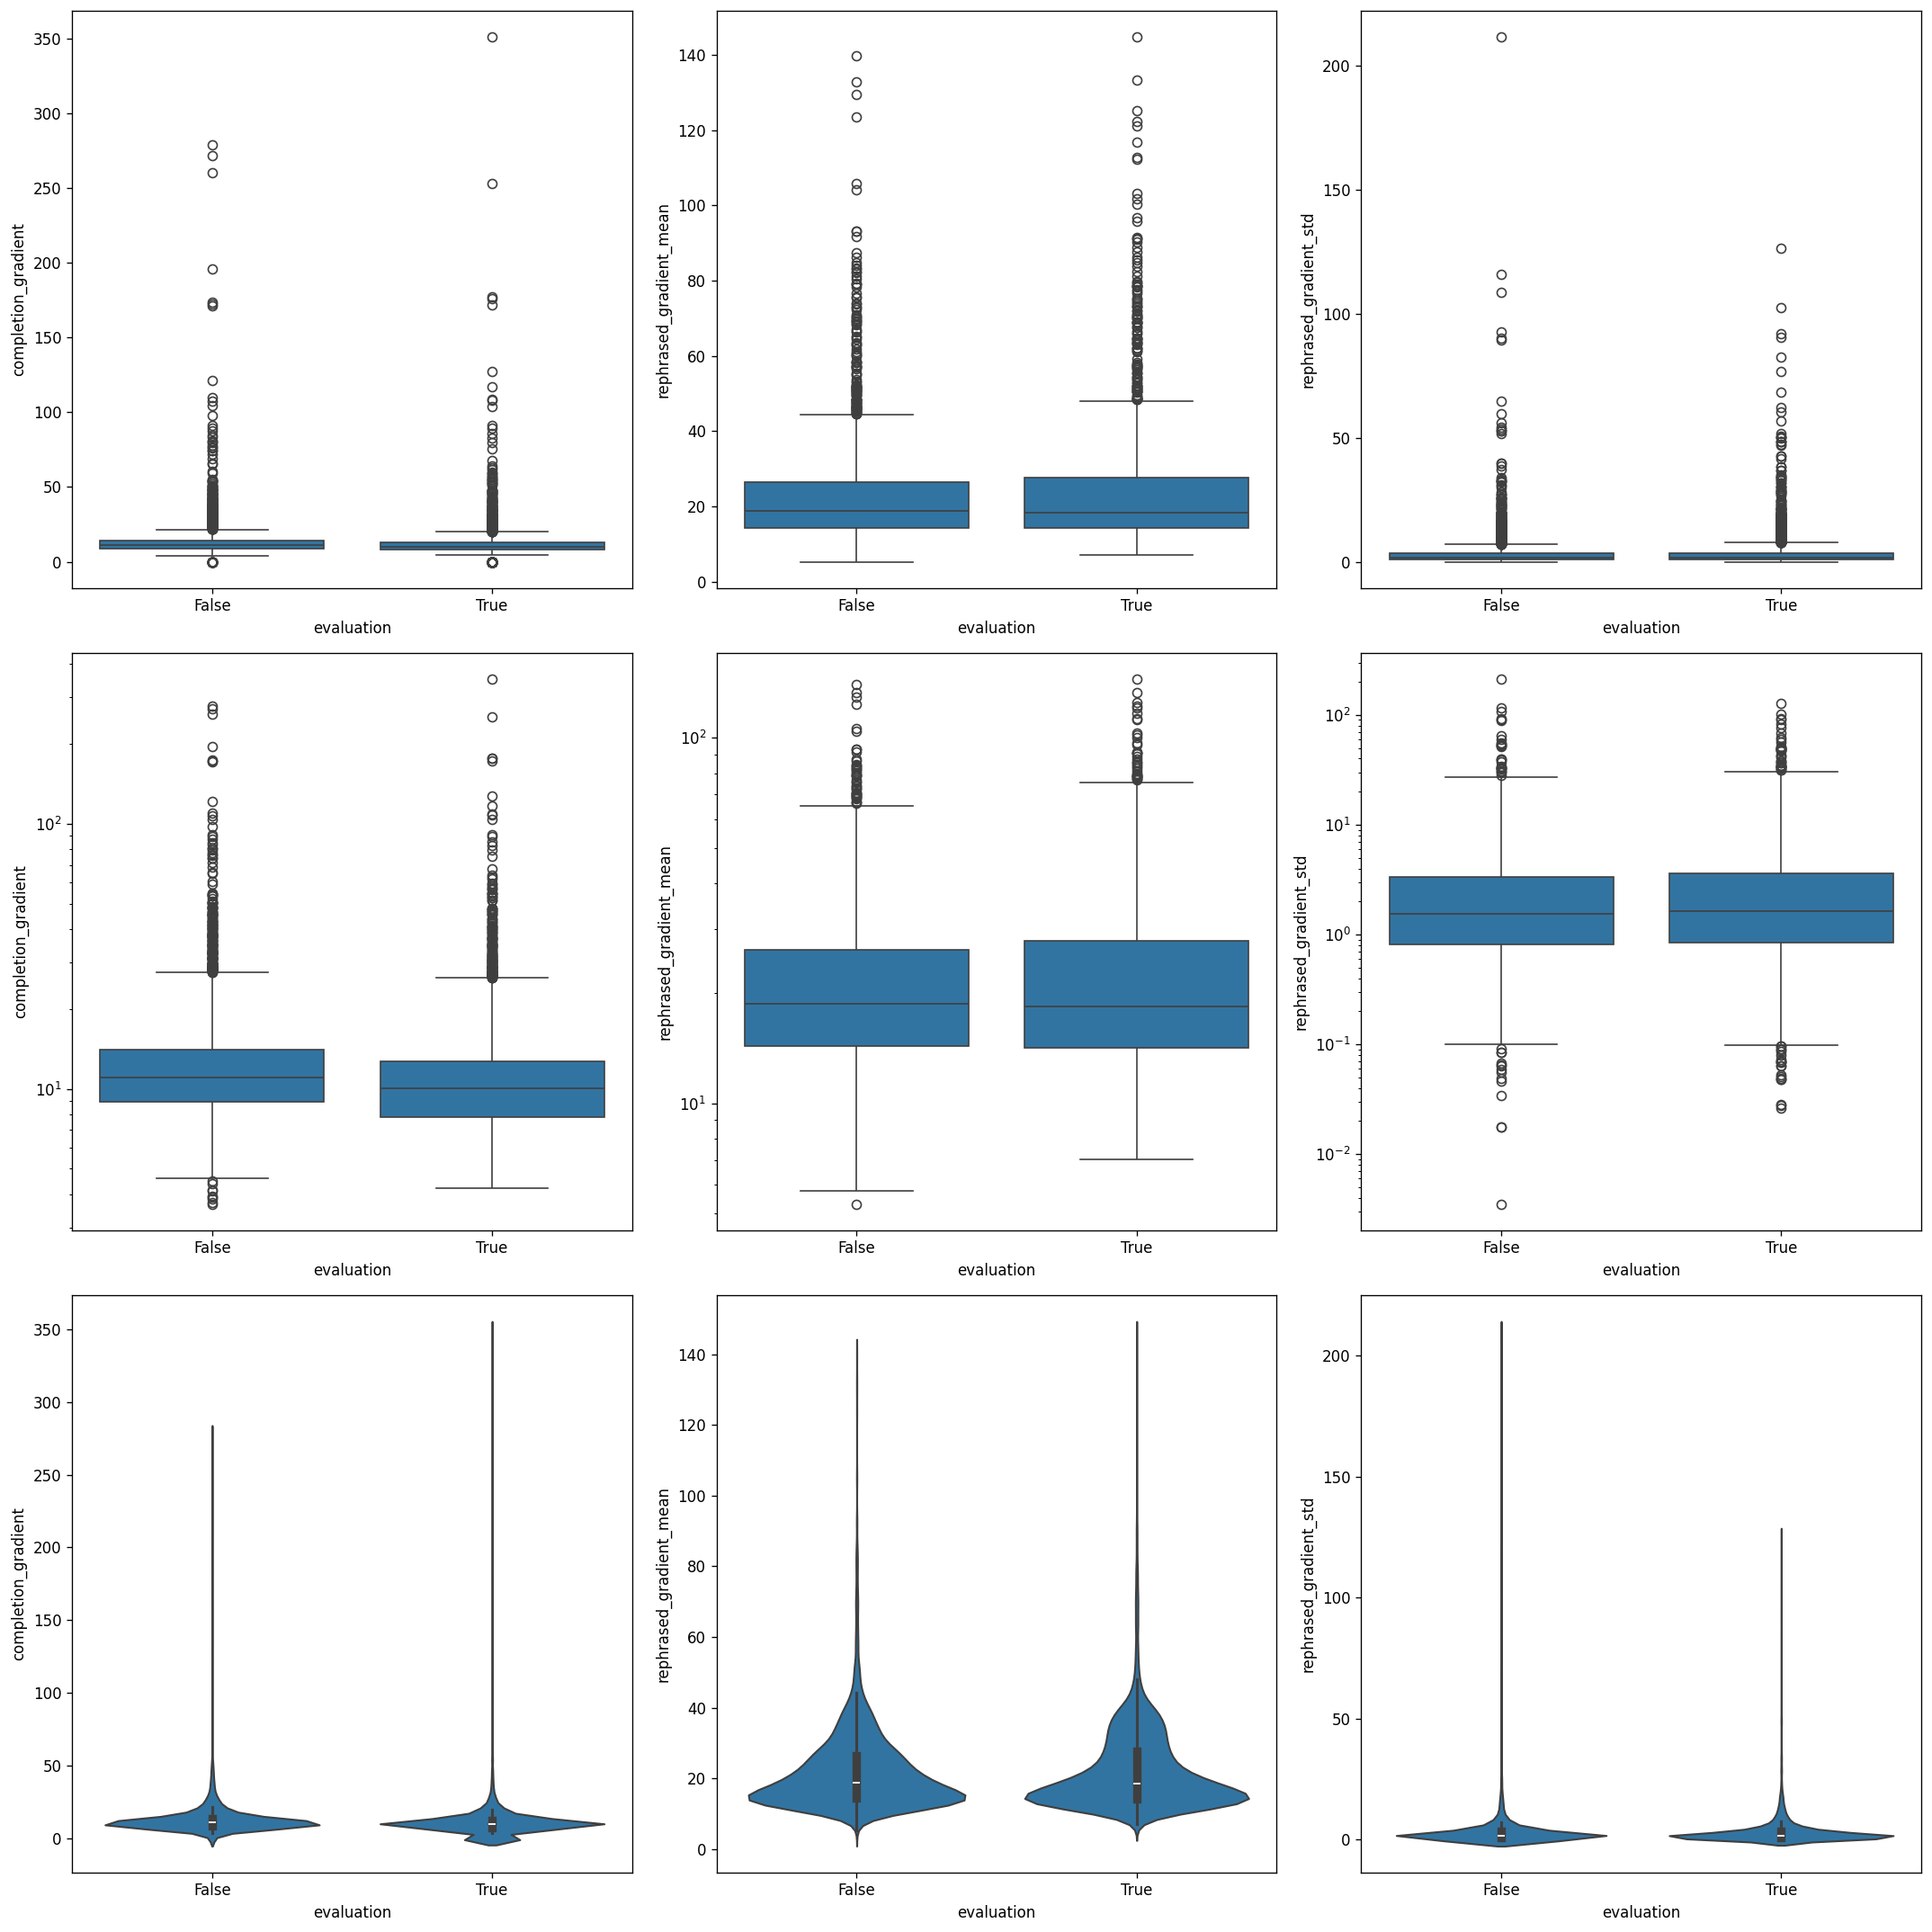

In [841]:
plt_width = 3
plt_height = 3

fig, axs = plt.subplots(
    plt_height, plt_width, figsize=(plt_width * plot_size, plt_height * plot_size)
)

sns.boxplot(data=df, x="evaluation", y="completion_gradient", ax=axs[0][0])
sns.boxplot(data=df, x="evaluation", y="rephrased_gradient_mean", ax=axs[0][1])
sns.boxplot(data=df, x="evaluation", y="rephrased_gradient_std", ax=axs[0][2])
sns.boxplot(data=df, x="evaluation", y="completion_gradient", ax=axs[1][0], log_scale=True)
sns.boxplot(data=df, x="evaluation", y="rephrased_gradient_mean", ax=axs[1][1], log_scale=True)
sns.boxplot(data=df, x="evaluation", y="rephrased_gradient_std", ax=axs[1][2], log_scale=True)
sns.violinplot(data=df, x="evaluation", y="completion_gradient", ax=axs[2][0])
sns.violinplot(data=df, x="evaluation", y="rephrased_gradient_mean", ax=axs[2][1])
sns.violinplot(data=df, x="evaluation", y="rephrased_gradient_std", ax=axs[2][2])

plt.tight_layout()

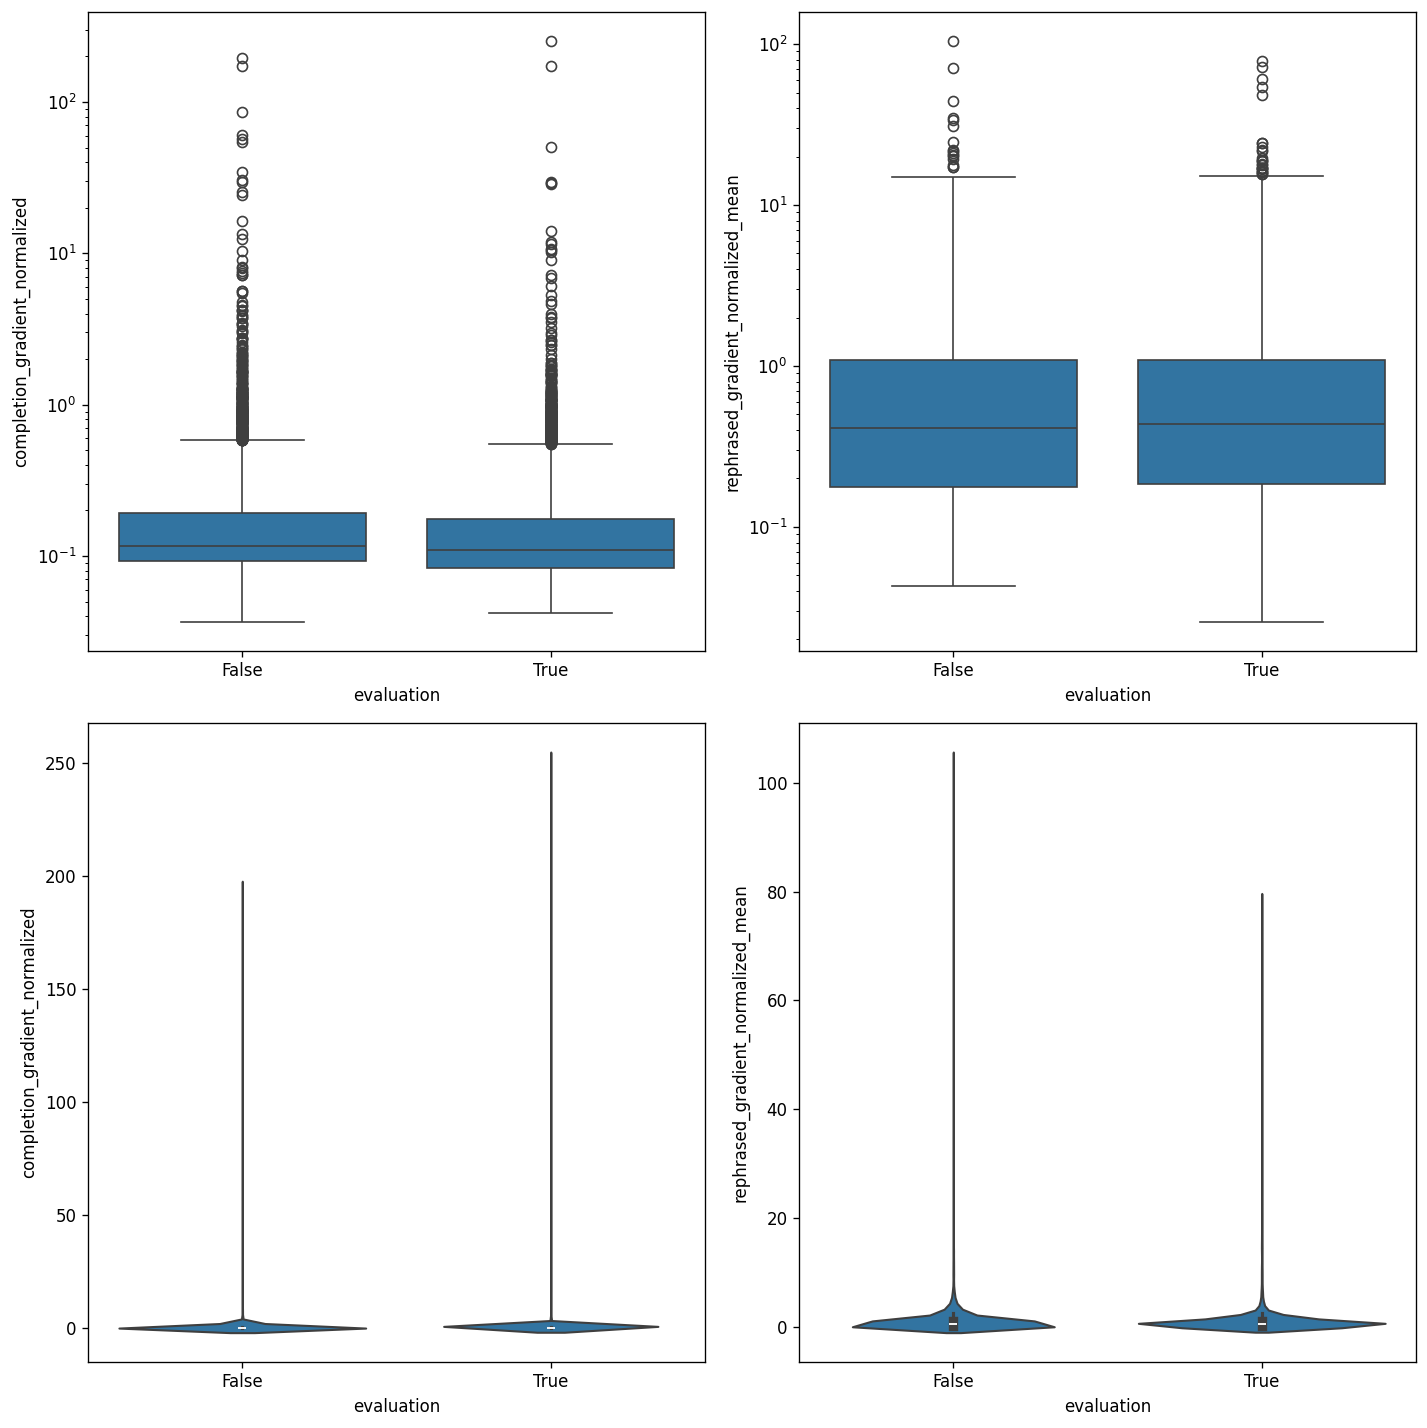

In [842]:
plt_width = 2
plt_height = 2

fig, axs = plt.subplots(
    plt_height, plt_width, figsize=(plt_width * plot_size, plt_height * plot_size)
)

sns.boxplot(data=df, x="evaluation", y="completion_gradient_normalized", ax=axs[0][0], log_scale=True)
sns.boxplot(data=df, x="evaluation", y="rephrased_gradient_normalized_mean", ax=axs[0][1], log_scale=True)
sns.violinplot(data=df, x="evaluation", y="completion_gradient_normalized", ax=axs[1][0])
sns.violinplot(data=df, x="evaluation", y="rephrased_gradient_normalized_mean", ax=axs[1][1])

plt.tight_layout()

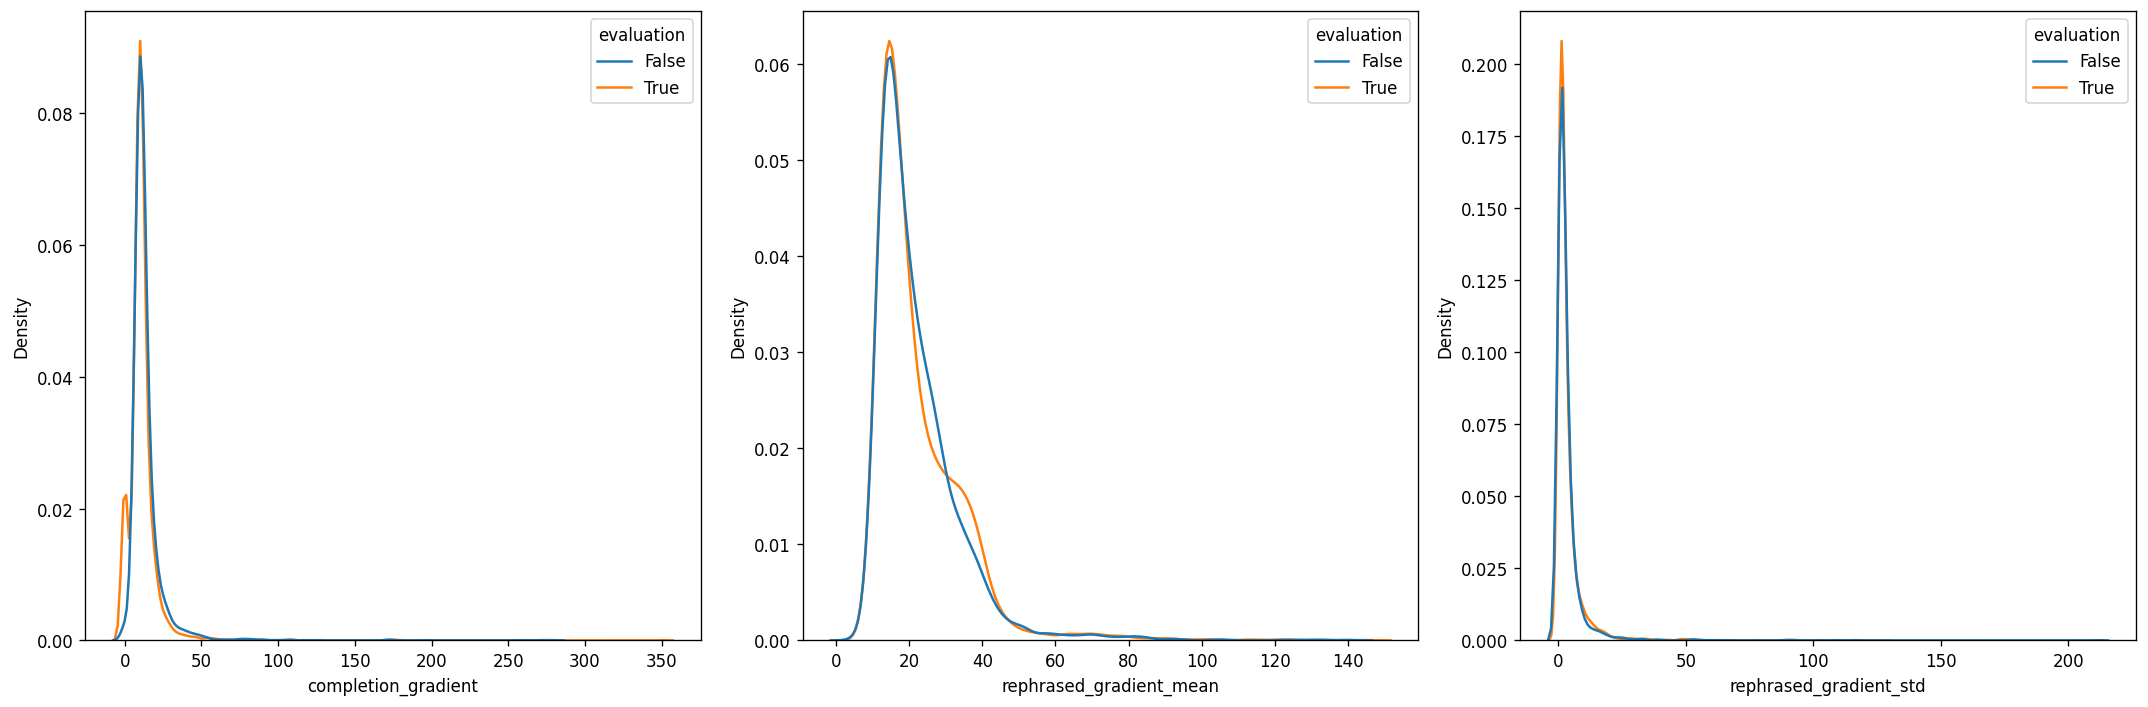

In [843]:
plt_width = 3
plt_height = 1

fig, axs = plt.subplots(
    plt_height, plt_width, figsize=(plt_width * plot_size, plt_height * plot_size)
)

sns.kdeplot(data=df, x="completion_gradient", hue="evaluation", common_norm=False, ax=axs[0])
sns.kdeplot(data=df, x="rephrased_gradient_mean", hue="evaluation", common_norm=False, ax=axs[1])
sns.kdeplot(data=df, x="rephrased_gradient_std", hue="evaluation", common_norm=False, ax=axs[2])

plt.tight_layout()

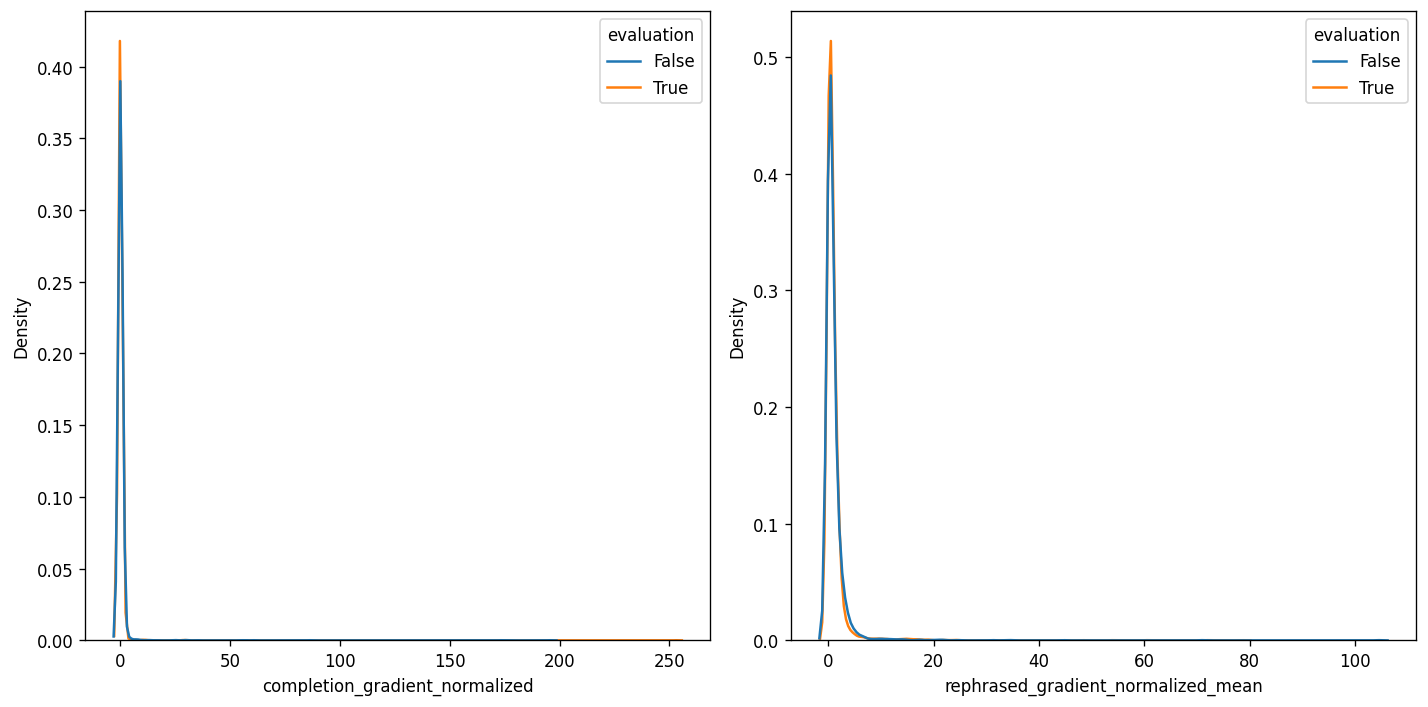

In [844]:
plt_width = 2
plt_height = 1

fig, axs = plt.subplots(
    plt_height, plt_width, figsize=(plt_width * plot_size, plt_height * plot_size)
)

sns.kdeplot(data=df, x="completion_gradient_normalized", hue="evaluation", common_norm=False, ax=axs[0])
sns.kdeplot(data=df, x="rephrased_gradient_normalized_mean", hue="evaluation", common_norm=False, ax=axs[1])

plt.tight_layout()

In [845]:
true_gradients = df[df["evaluation"] == True]["completion_gradient"]
false_gradients = df[df["evaluation"] == False]["completion_gradient"]

t_stat, p_value = ttest_ind(true_gradients, false_gradients, equal_var=False)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: -8.773476944237979, P-value: 2.1341531038476213e-18


In [846]:
true_gradients = df[df["evaluation"] == True]["completion_gradient_normalized"]
false_gradients = df[df["evaluation"] == False]["completion_gradient_normalized"]

t_stat, p_value = ttest_ind(true_gradients, false_gradients, equal_var=False)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: -1.2529097836486456, P-value: 0.21027755502503367


In [847]:
bins = 25
df["completion_gradient_bins"] = pd.cut(
    df["completion_gradient"], bins=bins, labels=False
)
df["rephrased_gradient_mean_bins"] = pd.cut(
    df["rephrased_gradient_mean"], bins=bins, labels=False
)
df["rephrased_gradient_std_bins"] = pd.cut(
    df["rephrased_gradient_std"], bins=bins, labels=False
)
df["completion_gradient_normalized_bins"] = pd.cut(
    df["completion_gradient_normalized"], bins=bins, labels=False
)
df["rephrased_gradient_normalized_mean_bins"] = pd.cut(
    df["rephrased_gradient_normalized_mean"], bins=bins, labels=False
)

<Axes: xlabel='rephrased_gradient_std_bins', ylabel='evaluation'>

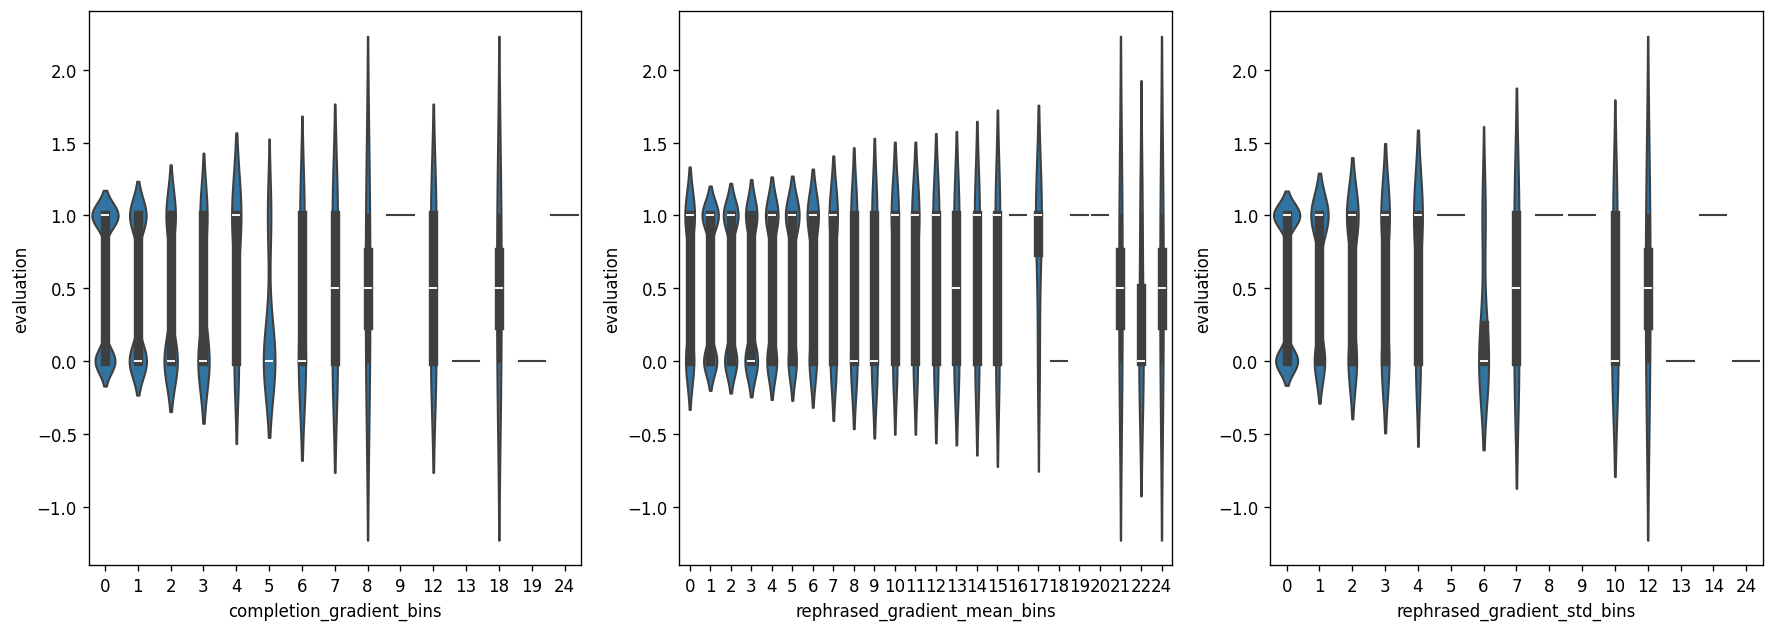

In [855]:
plt_width = 3
plt_height = 1

fig, axs = plt.subplots(
    plt_height, plt_width, figsize=(plt_width * plot_size, plt_height * plot_size)
)

sns.violinplot(
    data=df,
    x="completion_gradient_bins",
    y="evaluation",
    ax=axs[0],
)
sns.violinplot(
    data=df,
    x="rephrased_gradient_mean_bins",
    y="evaluation",
    ax=axs[1],
)
sns.violinplot(
    data=df,
    x="rephrased_gradient_std_bins",
    y="evaluation",
    ax=axs[2],
)

<Axes: xlabel='rephrased_gradient_normalized_mean_bins', ylabel='evaluation'>

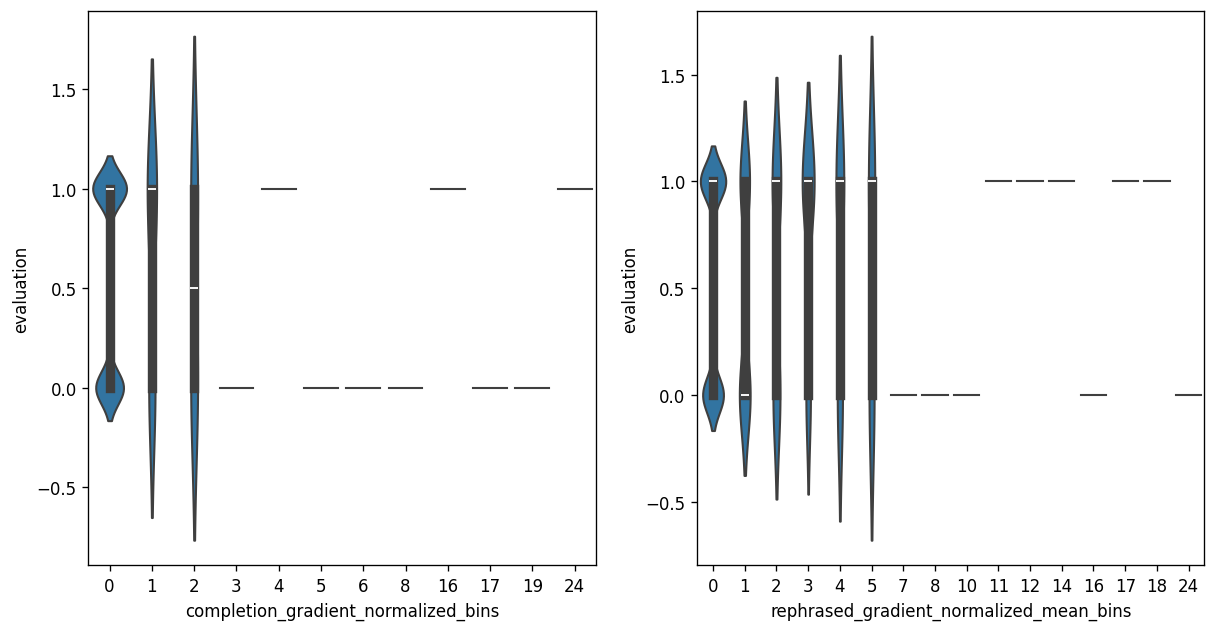

In [849]:
plt_width = 2
plt_height = 1

fig, axs = plt.subplots(
    plt_height, plt_width, figsize=(plt_width * plot_size, plt_height * plot_size)
)

sns.violinplot(
    data=df,
    x="completion_gradient_normalized_bins",
    y="evaluation",
    ax=axs[0],
)
sns.violinplot(
    data=df,
    x="rephrased_gradient_normalized_mean_bins",
    y="evaluation",
    ax=axs[1],
)

<Axes: xlabel='rephrased_gradient_std_bins', ylabel='mean_evaluation'>

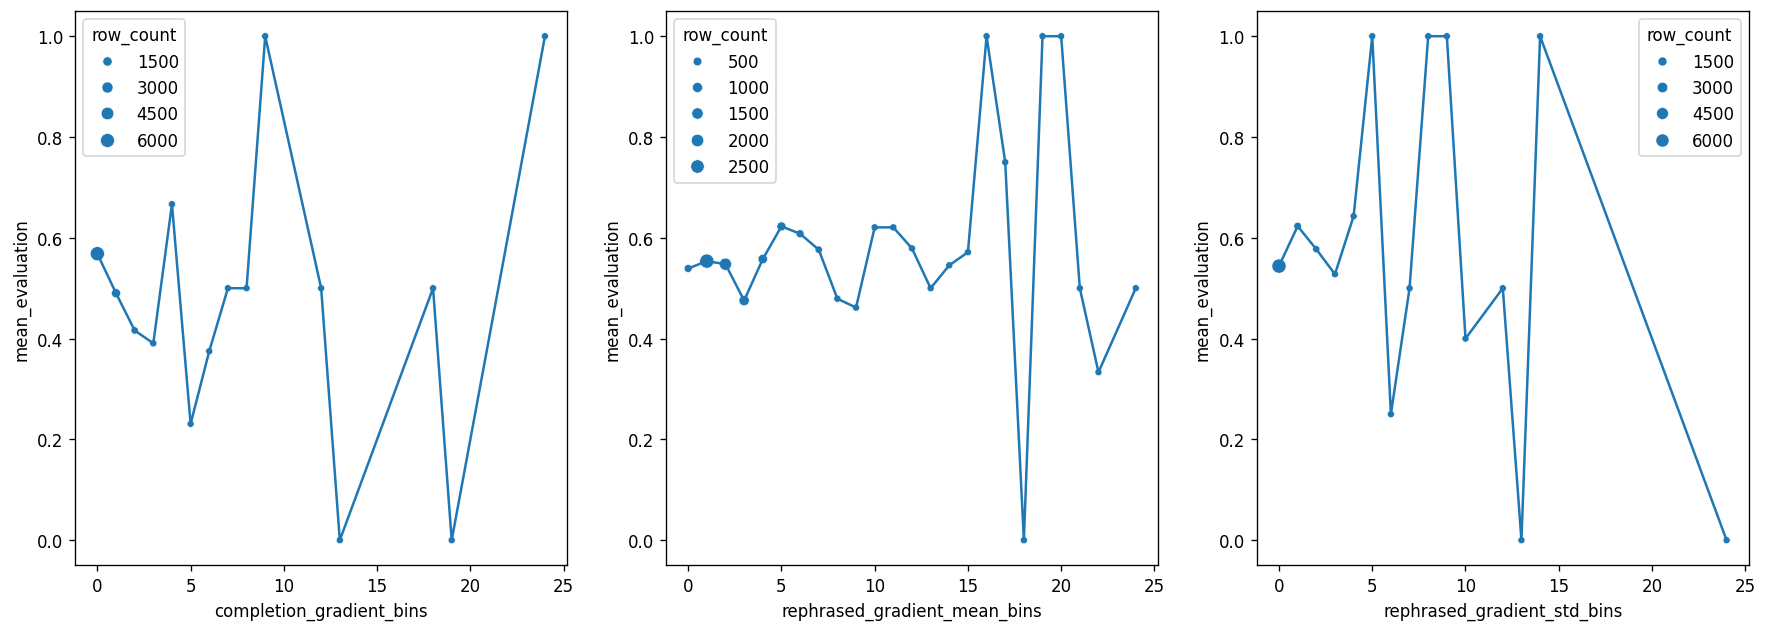

In [850]:
plt_width = 3
plt_height = 1

fig, axs = plt.subplots(
    plt_height, plt_width, figsize=(plt_width * plot_size, plt_height * plot_size)
)

sns.lineplot(
    data=df.groupby("completion_gradient_bins").agg(
        mean_evaluation=("evaluation", "mean"), row_count=("evaluation", "size")
    ),
    x="completion_gradient_bins",
    y="mean_evaluation",
    ax=axs[0],
)
sns.scatterplot(
    data=df.groupby("completion_gradient_bins").agg(
        mean_evaluation=("evaluation", "mean"), row_count=("evaluation", "size")
    ),
    x="completion_gradient_bins",
    y="mean_evaluation",
    size="row_count",
    ax=axs[0],
)

sns.lineplot(
    data=df.groupby("rephrased_gradient_mean_bins").agg(
        mean_evaluation=("evaluation", "mean"), row_count=("evaluation", "size")
    ),
    x="rephrased_gradient_mean_bins",
    y="mean_evaluation",
    ax=axs[1],
)
sns.scatterplot(
    data=df.groupby("rephrased_gradient_mean_bins").agg(
        mean_evaluation=("evaluation", "mean"), row_count=("evaluation", "size")
    ),
    x="rephrased_gradient_mean_bins",
    y="mean_evaluation",
    size="row_count",
    ax=axs[1],
)

sns.lineplot(
    data=df.groupby("rephrased_gradient_std_bins").agg(
        mean_evaluation=("evaluation", "mean"), row_count=("evaluation", "size")
    ),
    x="rephrased_gradient_std_bins",
    y="mean_evaluation",
    ax=axs[2],
)
sns.scatterplot(
    data=df.groupby("rephrased_gradient_std_bins").agg(
        mean_evaluation=("evaluation", "mean"), row_count=("evaluation", "size")
    ),
    x="rephrased_gradient_std_bins",
    y="mean_evaluation",
    size="row_count",
    ax=axs[2],
)

<Axes: xlabel='rephrased_gradient_normalized_mean_bins', ylabel='mean_evaluation'>

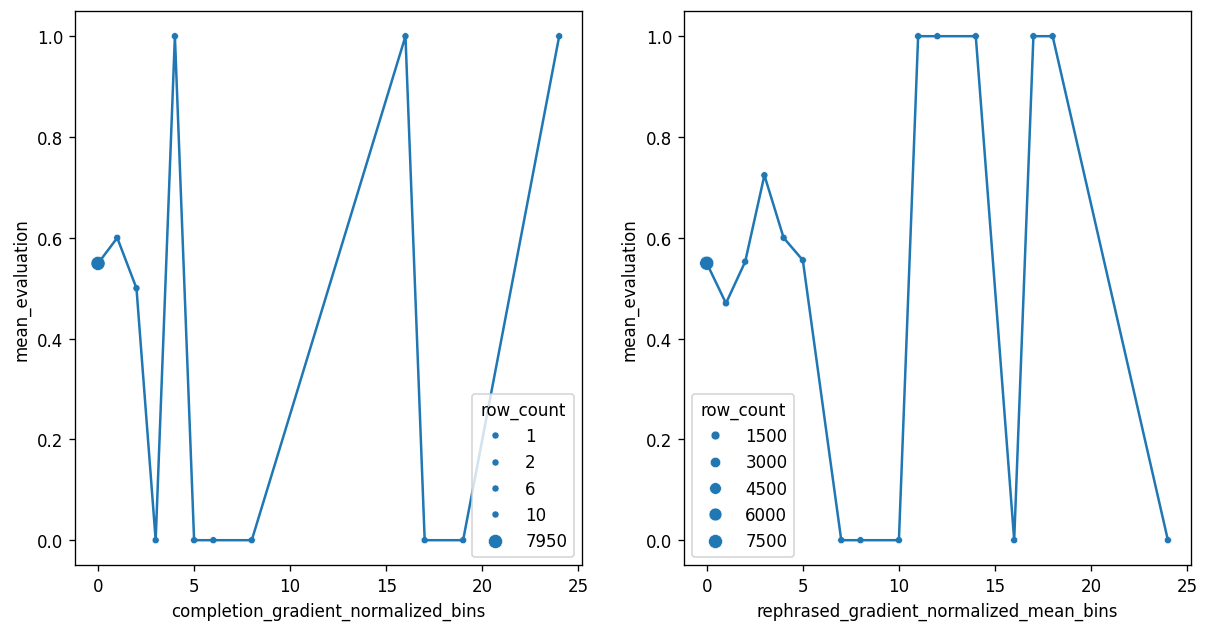

In [851]:
plt_width = 2
plt_height = 1

fig, axs = plt.subplots(
    plt_height, plt_width, figsize=(plt_width * plot_size, plt_height * plot_size)
)

sns.lineplot(
    data=df.groupby("completion_gradient_normalized_bins").agg(
        mean_evaluation=("evaluation", "mean"), row_count=("evaluation", "size")
    ),
    x="completion_gradient_normalized_bins",
    y="mean_evaluation",
    ax=axs[0],
)
sns.scatterplot(
    data=df.groupby("completion_gradient_normalized_bins").agg(
        mean_evaluation=("evaluation", "mean"), row_count=("evaluation", "size")
    ),
    x="completion_gradient_normalized_bins",
    y="mean_evaluation",
    size="row_count",
    ax=axs[0],
)

sns.lineplot(
    data=df.groupby("rephrased_gradient_normalized_mean_bins").agg(
        mean_evaluation=("evaluation", "mean"), row_count=("evaluation", "size")
    ),
    x="rephrased_gradient_normalized_mean_bins",
    y="mean_evaluation",
    ax=axs[1],
)
sns.scatterplot(
    data=df.groupby("rephrased_gradient_normalized_mean_bins").agg(
        mean_evaluation=("evaluation", "mean"), row_count=("evaluation", "size")
    ),
    x="rephrased_gradient_normalized_mean_bins",
    y="mean_evaluation",
    size="row_count",
    ax=axs[1],
)